In [1]:
#%matplotlib qt5
import sys
sys.path.append('../TP2/code/')
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt
import control as ctl
from matplotlib import cm
from splane import pzmap, grpDelay, bodePlot, convert2SOS, pretty, epsilonButter

orden del filtro:  3
                                   0.008 s^3 +  +  + 
T(s) = --------------------------------------------------------------------------
       1.0 s^6 + 0.4 s^5 + 3.08 s^4 + 0.809 s^3 + 3.079 s^2 + 0.4 s^1 + 0.999 s^0


array([0.9048287 , 1.10498706])

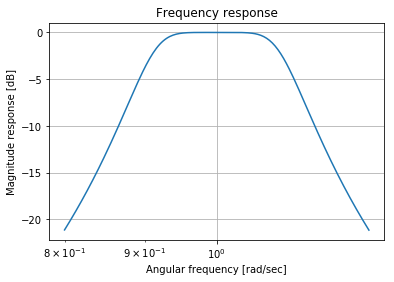

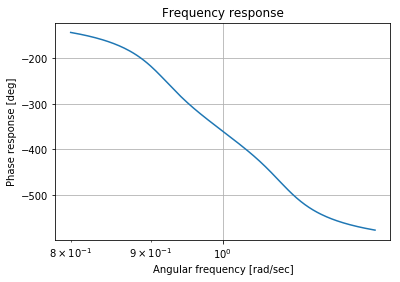

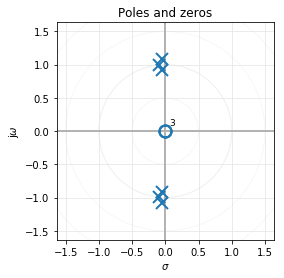

In [2]:
#%matplotlib qt5
w_s1 = 2*np.pi*0.7407*10e3
w_s2 = 2*np.pi*1.35*10e3
w_ci = 2*np.pi*0.9049*10e3
w_cs = 2*np.pi*1.1049*10e3

att_max = 3
att_min = 20
w_0 = 2*np.pi*10e3

ORDER, w_n = sig.buttord([w_ci/w_0, w_cs/w_0],[w_s1/w_0, w_s2/w_0],att_max, att_min, analog = True)
#ORDER, w_n = sig.buttord([w_ci, w_cs],[w_s1, w_s2],att_max, att_min, analog = True)

print("orden del filtro: ",ORDER)

P_s, Q_s = sig.butter(ORDER, w_n, 'bandpass', analog=True)

H_s = sig.TransferFunction(P_s, Q_s)

pretty(H_s)
bodePlot(H_s,0.8,1/0.8)
pzmap(H_s)

display(w_n)

                          0.04 s^2 +  + 
T(s) = ----------------------------------------------------
       1.0 s^4 + 0.283 s^3 + 2.04 s^2 + 0.283 s^1 + 1.0 s^0


array([[1.        , 0.15139986, 1.1522047 ],
       [1.        , 0.13140014, 0.86790134]])

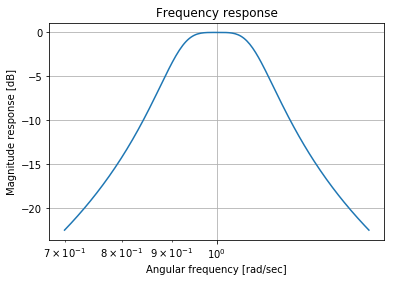

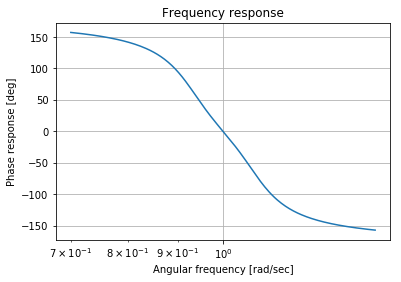

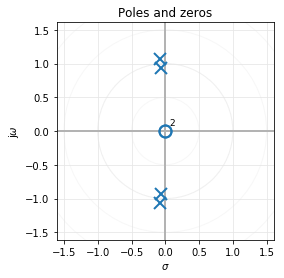

In [3]:
HH =sig.TransferFunction([0.04,0,0],[1,0.2828,2.04,0.2828,1])
pretty(HH)
bodePlot(HH,0.7,1/0.7)
pzmap(HH)
convert2SOS(HH)